In [2]:
import pandas as pd
import shapely
import geopandas as gpd

#### We'll also limit the number of printed rows to 6 to save space

In [3]:
pd.set_option('display.max_rows', 6)

The function gpd.read_file imports a GeoPackage file into a GeoDataFrame named gdf

In [4]:
gdf = gpd.read_file('data/world.gpkg')

# The result is an object with 177 rows and 11 columns as shown below:
print(type(gdf))
gdf.shape

<class 'geopandas.geodataframe.GeoDataFrame'>


(177, 11)

In [5]:
# create a subset of the gdf dataset containing only the country name and the geometry.
gdf = gdf[['name_long', 'geometry']]
gdf

,name_long,geometry
0,Fiji,"MULTIPOLYGON (((-180.00000 -16.55522, -179.917..."
1,Tanzania,"MULTIPOLYGON (((33.90371 -0.95000, 31.86617 -1..."
2,Western Sahara,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27..."
...,...,...
174,Kosovo,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41..."
175,Trinidad and Tobago,"MULTIPOLYGON (((-61.68000 10.76000, -61.66000 ..."
176,South Sudan,"MULTIPOLYGON (((30.83385 3.50917, 31.24556 3.7..."


In [6]:
# To subset the data for Egypt:
gdf[gdf['name_long'] == 'Egypt']

,name_long,geometry
163,Egypt,"MULTIPOLYGON (((36.86623 22.00000, 36.69069 22..."


c:\python37\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


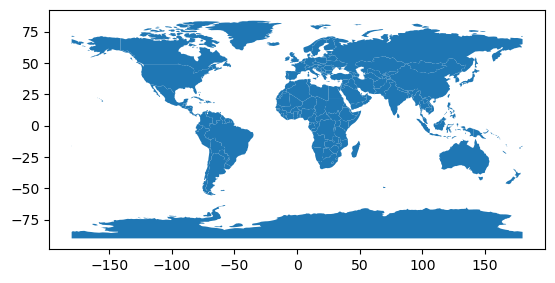

In [7]:
# To get a sense of the spatial component of the vector layer, it can be plotted using:
gdf.plot()

In [8]:
# Interactive maps of GeoDataframe objects can be created with the .explore command:
gdf.explore()

# A subset of the data can also be plotted in a similar fashion:
gdf[gdf['name_long'] == 'Egypt'].explore()

c:\python37\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
c:\python37\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).ep

#### Geometry columns
The recommendation is to use the fixed .geometry property, which refers to the geometry column regardless whether its name is 'geometry' or not.

In [9]:
# The geometry column contains multipolygons associated with each countries
gdf.geometry

0      MULTIPOLYGON (((-180.00000 -16.55522, -179.917...
1      MULTIPOLYGON (((33.90371 -0.95000, 31.86617 -1...
2      MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27...
                             ...                        
174    MULTIPOLYGON (((20.59025 41.85541, 20.71731 41...
175    MULTIPOLYGON (((-61.68000 10.76000, -61.66000 ...
176    MULTIPOLYGON (((30.83385 3.50917, 31.24556 3.7...
Name: geometry, Length: 177, dtype: geometry

In [10]:
# The geometry column also contains the spatial reference info if any
gdf.geometry.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
# Many geometry operations, such as calculating the centroid, buffer, 
# or bounding box of each feature, involve just the geometry.
# Applying this type of operation on a GeoDataFrame is therefore 
# basically a shortcut to applying it on the GeoSeries object in the geometry column.
# For example, the two below commands return exactly the same results:
gdf.envelope

0      POLYGON ((-180.00000 -18.28799, 179.99999 -18....
1      POLYGON ((29.34000 -11.72094, 40.31659 -11.720...
2      POLYGON ((-17.06342 20.99975, -8.66512 20.9997...
                             ...                        
174    POLYGON ((20.07070 41.84711, 21.77505 41.84711...
175    POLYGON ((-61.95000 10.00000, -60.89500 10.000...
176    POLYGON ((23.88698 3.50917, 35.29801 3.50917, ...
Length: 177, dtype: geometry

In [12]:
gdf.geometry.envelope

0      POLYGON ((-180.00000 -18.28799, 179.99999 -18....
1      POLYGON ((29.34000 -11.72094, 40.31659 -11.720...
2      POLYGON ((-17.06342 20.99975, -8.66512 20.9997...
                             ...                        
174    POLYGON ((20.07070 41.84711, 21.77505 41.84711...
175    POLYGON ((-61.95000 10.00000, -60.89500 10.000...
176    POLYGON ((23.88698 3.50917, 35.29801 3.50917, ...
Length: 177, dtype: geometry

In [13]:
# Note that .envelope or similar operations like .centroid/.buffer return only the geometry (i.e.a GeoSeries) object
# In case we want to return the GeoDataFrame, we can create a copy of the GeoDataFrame and then “overwrite” its geometry
gdf2 = gdf.copy()
gdf2.geometry = gdf.envelope
gdf2

,name_long,geometry
0,Fiji,"POLYGON ((-180.00000 -18.28799, 179.99999 -18...."
1,Tanzania,"POLYGON ((29.34000 -11.72094, 40.31659 -11.720..."
2,Western Sahara,"POLYGON ((-17.06342 20.99975, -8.66512 20.9997..."
...,...,...
174,Kosovo,"POLYGON ((20.07070 41.84711, 21.77505 41.84711..."
175,Trinidad and Tobago,"POLYGON ((-61.95000 10.00000, -60.89500 10.000..."
176,South Sudan,"POLYGON ((23.88698 3.50917, 35.29801 3.50917, ..."


In [14]:
# Another useful property is the geometry type 
# Note that the types of geometries contained in a geometry column (and, thus, a vector layer) are not necessarily 
# the same for every row. It is possible to have multiple geometry types in a single GeoSeries
gdf.geometry.type

0      MultiPolygon
1      MultiPolygon
2      MultiPolygon
           ...     
174    MultiPolygon
175    MultiPolygon
176    MultiPolygon
Length: 177, dtype: object

In [15]:
gdf.geom_type

0      MultiPolygon
1      MultiPolygon
2      MultiPolygon
           ...     
174    MultiPolygon
175    MultiPolygon
176    MultiPolygon
Length: 177, dtype: object

In [16]:
# To summarize the occurrence of different geometry types in a geometry column:
gdf.geometry.type.value_counts()

MultiPolygon    177
dtype: int64

In [17]:
# A GeoDataFrame can also have multiple GeoSeries columns, as demonstrated in the following code section.
gdf['bbox'] = gdf.envelope
gdf['polygon'] = gdf.geometry
gdf

,name_long,geometry,bbox,polygon
0,Fiji,"MULTIPOLYGON (((-180.00000 -16.55522, -179.917...","POLYGON ((-180.00000 -18.28799, 179.99999 -18....","MULTIPOLYGON (((-180.00000 -16.55522, -179.917..."
1,Tanzania,"MULTIPOLYGON (((33.90371 -0.95000, 31.86617 -1...","POLYGON ((29.34000 -11.72094, 40.31659 -11.720...","MULTIPOLYGON (((33.90371 -0.95000, 31.86617 -1..."
2,Western Sahara,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27...","POLYGON ((-17.06342 20.99975, -8.66512 20.9997...","MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27..."
...,...,...,...,...
174,Kosovo,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41...","POLYGON ((20.07070 41.84711, 21.77505 41.84711...","MULTIPOLYGON (((20.59025 41.85541, 20.71731 41..."
175,Trinidad and Tobago,"MULTIPOLYGON (((-61.68000 10.76000, -61.66000 ...","POLYGON ((-61.95000 10.00000, -60.89500 10.000...","MULTIPOLYGON (((-61.68000 10.76000, -61.66000 ..."
176,South Sudan,"MULTIPOLYGON (((30.83385 3.50917, 31.24556 3.7...","POLYGON ((23.88698 3.50917, 35.29801 3.50917, ...","MULTIPOLYGON (((30.83385 3.50917, 31.24556 3.7..."


In [18]:
# Only one geometry column at a time is “active”, in the sense that it is being accessed in operations 
# involving the geometries (such as .centroid, .crs, etc.). To switch the active geometry column from one 
# GeoSeries column to another, we use .set_geometry
gdf = gdf.set_geometry('bbox')
gdf.explore()

In [19]:
gdf = gdf.set_geometry('polygon')
gdf.explore()

#### Geometries
Each element in the geometry column (GeoSeries) is a geometry object of class shapely

For example, here is one specific geometry selected by implicit index (Canada, the 4th element in gdf’s geometry column).

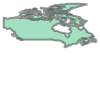

In [20]:
gdf.geometry.iloc[3]

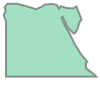

In [21]:
# We can also select a specific geometry based on the 'name_long' attribute
gdf[gdf['name_long'] == 'Egypt'].geometry.iloc[0]

The shapely pkg is compatible with the Simple Feature standard

The following section demonstrates creating a shapely geometry of each type from scratch

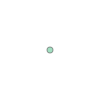

In [22]:
# Creating a point geometry from a list of coordinates uses the shapely.Point function
point = shapely.Point([5, 2])
point

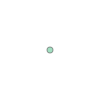

In [23]:
# Creating a point geometry from the WKT format
point = shapely.from_wkt('POINT (5 2)')
point

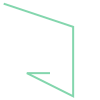

In [24]:
# A linestring can be created based on a list of coordinate tuples/lists
linestring = shapely.LineString([(1,5), (4,4), (4,1), (2,2), (3,2)])
linestring

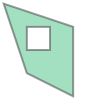

In [25]:
# Creation of a Polygon geometry is similar but our first n last coordinate must be the same to ensure that the polygon
# is closed
polygon = shapely.Polygon(
    [(1,5), (2,2), (4,1), (4,4), (1,5)],  ## Exterior
    [[(2,4), (3,4), (3,3), (2,3), (2,4)]]  ## Hole(s)
)
polygon

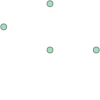

In [26]:
# A Multipoint geometry is also created from a list of coordinate tuples
# where each element represents a single point
multipoint = shapely.MultiPoint([(5,2), (1,3), (3,4), (3,2)])
multipoint

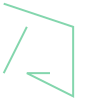

In [27]:
# A MultiLineString on the other hand has one list of coordinates for each line in the MultiLineString
multilinestring = shapely.MultiLineString([
    [(1,5), (4,4), (4,1), (2,2), (3,2)],  ## 1st sequence
    [(1,2), (2,4)]  ## 2nd sequence, etc.
])
multilinestring

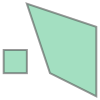

In [28]:
# A MultiPolygon is created from a list of Polygon geometries 
# Here we're creating a MultiPolygon with two parts both without holes
multipolygon = shapely.MultiPolygon([
    [[(1,5), (2,2), (4,1), (4,4), (1,5)], []],  ## Polygon 1 
    [[(0,2), (1,2), (1,3), (0,3), (0,2)], []]   ## Polygon 2, etc.
])
multipolygon

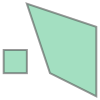

In [29]:
# Since the required input has 4 hierarchical levels, it may be more clear to create the single-part
# 'Polygon' geometries in advance using the respective shapely.Polygon and then pass them to shapely.MultiPolygon
multipolygon = shapely.MultiPolygon([
    shapely.Polygon([(1,5), (2,2), (4,1), (4,4), (1,5)]),  ## Polygon 1 
    shapely.Polygon([(0,2), (1,2), (1,3), (0,3), (0,2)])   ## Polygon 2, etc.
])
multipolygon

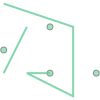

In [30]:
# A GeometryCollection is a list with one/more of the other six geometry types
geometrycollection = shapely.GeometryCollection([multipoint, multilinestring])
geometrycollection

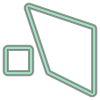

In [31]:
# shapely geometries act as atomic units of vector data, meaning that there is no concept of geometry sets
# each operation accepts individual geometry object(s) as input, and returns an individual geometry as output.
# For example, the ffg expression calculates the difference btw the buffered multipolygon and itself:
multipolygon.buffer(0.2).difference(multipolygon)

In [32]:
# To print the WKT of a shapely geometry
print(linestring)

LINESTRING (1 5, 4 4, 4 1, 2 2, 3 2)


In [33]:
# To return the list of all coordinates of the polygon geometry exterior:
list(polygon.exterior.coords)

[(1.0, 5.0), (2.0, 2.0), (4.0, 1.0), (4.0, 4.0), (1.0, 5.0)]

#### Vector Layer from Scratch
How a GeoDataFrame object is created - geometries come from a GeoSeries object (which consist of shapely geometries)
while attributes are taken from Series objects

Objects of class GeoDataFrame represent such data by combining the attributes (Series) with the simple feature geometry column (GeoSeries)

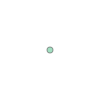

In [34]:
# To illustrate attributes, we will represent a temperature of 25°C in London on June 21st, 2023. 
# First we'll create a point geometry 
lnd_point = shapely.Point(0.1, 51.5)
lnd_point

In [35]:
# Next we'll create a GeoSeries of length 1 containing the point and a CRS definition (WGS84)
# Note that the shapely geometries goes into a list to illustrate that there can be more than one geometry
lnd_geom = gpd.GeoSeries([lnd_point], crs=4326)
lnd_geom

0    POINT (0.10000 51.50000)
dtype: geometry

In [36]:
# Next we combine the GeoSeries with other attributes into a dict. 
# The other attributes (if any) may be defined using list or Series objects. 
# Here we use the list option for defining the 3 attributes
# Note that the list can be of length>1, in case we are creating a layer with more than one feature (i.e., multiple rows).
lnd_data = {
  'name': ['London'],
  'temperature': [25],
  'date': ['2023-06-21'],
  'geometry': lnd_geom
}

In [37]:
# Finally the dict can be converted into a GeoDataFrame object
lnd_layer = gpd.GeoDataFrame(lnd_data)
lnd_layer

,name,temperature,date,geometry
0,London,25,2023-06-21,POINT (0.10000 51.50000)


What just happened? First, the coordinates were used to create the simple feature geometry (shapely). Second, the geometry was converted into a simple feature geometry column (GeoSeries) with a CRS. Third, attributes were combined with GeoSeries resulting in a GeoDataFrame object

In [38]:
# To illustrate how creating a layer with more than one feature look like:
lnd_point = shapely.Point(0.1, 51.5)
paris_point = shapely.Point(2.3, 48.9)
towns_geom = gpd.GeoSeries([lnd_point, paris_point], crs=4326)
towns_data = {
  'name': ['London', 'Paris'],
  'temperature': [25, 27],
  'date': ['2013-06-21', '2013-06-21'],
  'geometry': towns_geom
}
towns_layer = gpd.GeoDataFrame(towns_data)
towns_layer

,name,temperature,date,geometry
0,London,25,2013-06-21,POINT (0.10000 51.50000)
1,Paris,27,2013-06-21,POINT (2.30000 48.90000)


In [39]:
# Now we're able to create an interactive map of the towns_layer object
towns_layer.explore(color='red', marker_kwds={'radius': 10})

In [40]:
# A spatial (point) layer can also be created from pandas DataFrame obj that contains columns with coords
# To demonstrate we first a GeoSeries obj from the coords and then combine it with the DataFrame to form a GeoDataFrame:
towns_table = pd.DataFrame({
  'name': ['London', 'Paris'],
  'temperature': [25, 27],
  'date': ['2017-06-21', '2017-06-21'],
  'x': [0.1, 2.3],
  'y': [51.5, 48.9]
})
towns_geom = gpd.points_from_xy(towns_table['x'], towns_table['y'])
towns_layer = gpd.GeoDataFrame(towns_table, geometry=towns_geom, crs=4326)

#### Derived numeric properties
Vector layers are characterized by two essential derived numeric properties: 
length (.length)—applicable to lines, and area (.area)—applicable to polygons.

In [41]:
linestring.length

9.39834563766817

In [42]:
multipolygon.area

8.0

In [43]:
gpd.GeoSeries([point, linestring, polygon, multipolygon]).area

0    0.0
1    0.0
2    6.0
3    8.0
dtype: float64

In [44]:
# length and area measurements for geometries in WGS84 (crs=4326) are returned in decimal degrees and essentially meaningless
# To obtain meaningful length and area measurements for data in a geographic CRS, the geometries 
# first need to be transformed to a projected CRS applicable to the area of interest
# For example, the area of Slovenia can be calculated in the UTM zone 33N CRS. Results is in m2 
gdf[gdf['name_long'] == 'Slovenia'].to_crs(32633).area

150    1.910410e+10
dtype: float64

#### Raster data
The two most notable approaches for working with rasters in Python are provided by rasterio and rioxarray packages.

Using rasterio

In [52]:
# As the raster data is stored within numpy arrays, we import the numpy package 
# and make all its functions accessible for effective data manipulation. 
# Finally, we import the rasterio.plot sub-module for its rasterio.plot.show function 
# that allows for quick visualization of rasters
import numpy as np
import rasterio
import rasterio.plot # we import the rasterio.plot sub-module for its rasterio.plot.show function that allows for quick visualization of rasters.

#### When working with rasterio, importing a raster is actually a two-step process:
- First, we open a raster file “connection” using rasterio.open
- Second, we read raster values from the connection using the .read method

The rationale is that we do not always want to read all information from the file into memory, which is particularly important as rasters size can be larger than RAM size. Accordingly, the second step (.read) is selective, meaning that the user can fine tune the subset of values (bands, rows/columns, resolution, etc.) that are actually being read.

In [62]:
# We pass a file path to the rasterio.open func to create a DatasetReader file connection
# For this example, we use a single-band raster representing elevation in Zion National Park, stored in srtm.tif
src = rasterio.open('data/srtm.tif')
src

<open DatasetReader name='data/srtm.tif' mode='r'>

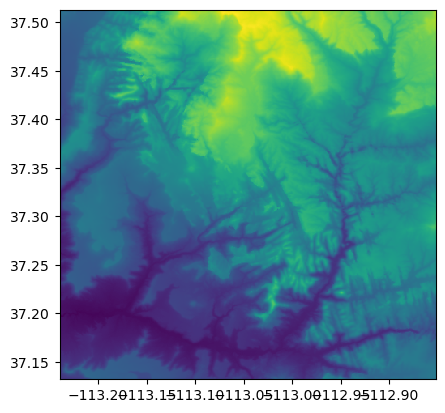

In [63]:
# To get a first impression of the raster, we plot using:
rasterio.plot.show(src)

In [64]:
# The DatasetReader contains the raster metadata, i.e. all of the info other than the raster values
src.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 65535.0,
 'width': 465,
 'height': 457,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0008333333332777796, 0.0, -113.23958321278403,
        0.0, -0.0008333333332777843, 37.512916763165805)}

In [ ]:
# In the second step, the .read() method is used to read the actual raster values
# Let's read the first n only layer from the srtm.tif raster using the file connection n .read 

In [65]:
# The result is a 2D numpy array where each value represents the elevation of the corresponding pixel
src.read(1)

array([[1728, 1718, 1715, ..., 2654, 2674, 2685],
       [1737, 1727, 1717, ..., 2649, 2677, 2693],
       [1739, 1734, 1727, ..., 2644, 2672, 2695],
       ...,
       [1326, 1328, 1329, ..., 1777, 1778, 1775],
       [1320, 1323, 1326, ..., 1771, 1770, 1772],
       [1319, 1319, 1322, ..., 1768, 1770, 1772]], dtype=uint16)

#### Raster from scratch
Conceptually a raster is an array combined with georeferencing information - the latter comprises a transformation matrix containing origin and resolution, and CRS definition 

In [66]:
# To create a raster, we first need to have an array with the values n then supplement it with georef info
elev = np.arange(1, 37, dtype=np.uint8).reshape(6, 6)
elev

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35, 36]], dtype=uint8)

In [67]:
# The grain array creates a categorical raster with values 0,1,2 corresponding to categ clay, silt n sand respectively
v = [
  1, 0, 1, 2, 2, 2, 
  0, 2, 0, 0, 2, 1, 
  0, 2, 2, 0, 0, 2, 
  0, 0, 1, 1, 1, 1, 
  1, 1, 1, 2, 1, 1, 
  2, 1, 2, 2, 0, 2
]
grain = np.array(v, dtype=np.uint8).reshape(6, 6)
grain

array([[1, 0, 1, 2, 2, 2],
       [0, 2, 0, 0, 2, 1],
       [0, 2, 2, 0, 0, 2],
       [0, 0, 1, 1, 1, 1],
       [1, 1, 1, 2, 1, 1],
       [2, 1, 2, 2, 0, 2]], dtype=uint8)

In [69]:
# Since the rasters are arbitrary, we also setup an arbitrary transformation matrix
new_transform = rasterio.transform.from_origin(
    west=-1.5, 
    north=1.5, 
    xsize=0.5, 
    ysize=0.5
)
new_transform

Affine(0.5, 0.0, -1.5,
       0.0, -0.5, 1.5)

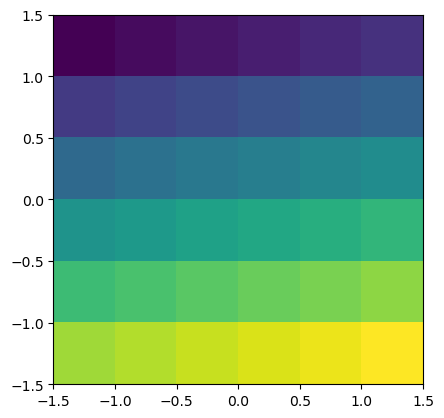

In [71]:
# The raster can now be plotted in its coordinate system, passing the array elev along with the transformation matrix
# to rasterio.plot.show
rasterio.plot.show(elev, transform=new_transform)

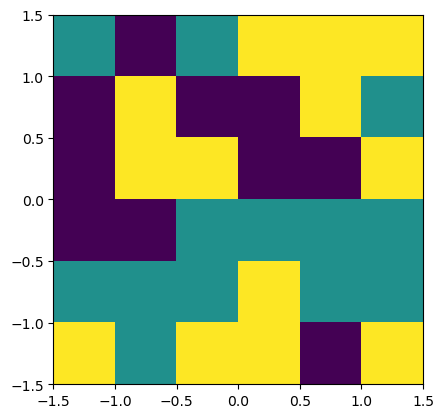

In [72]:
# Plotting the grain the same way
rasterio.plot.show(grain, transform=new_transform)

In [79]:
#Exporting the rasters to the 'output' directory
new_dataset = rasterio.open(
    'output/elev.tif', 'w', 
    driver='GTiff',
    height=elev.shape[0],
    width=elev.shape[1],
    count=1,
    dtype=elev.dtype,
    crs=4326,
    transform=new_transform
)
new_dataset.write(elev, 1)
new_dataset.close()

In [80]:
# Exporting the grain raster in the same way with the 
# only differences being the file name and the array we write into the connection.
new_dataset = rasterio.open(
    'output/grain.tif', 'w', 
    driver='GTiff',
    height=grain.shape[0],
    width=grain.shape[1],
    count=1,
    dtype=grain.dtype,
    crs=4326,
    transform=new_transform
)
new_dataset.write(grain, 1)
new_dataset.close()

#### CRS in Python
The geopandas and rasterio packages use the PROJ software for CRS definition and calculations. 
The pyproj pkg is a low-level interface to PROJ. Using its functions we can examine the list of projections supported by PROJ

In [81]:
import pyproj
epsg_codes = pyproj.get_codes('EPSG', 'CRS')  ## Supported EPSG codes
epsg_codes[:5]  ## Print first five supported EPSG codes

['2000', '20004', '20005', '20006', '20007']

In [84]:
pyproj.CRS.from_epsg(4326)  ## Printout of WGS84 CRS (EPSG:4326)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [85]:
# CRSs of geopandas (vector layer or geometry column) and rasterio (raster) objects can be queried with the .crs property
zion = gpd.read_file('data/zion.gpkg')
zion.crs      # a projected CRS namely UTM zone 12

<Bound CRS: PROJCS["UTM Zone 12, Northern Hemisphere",GEOGCS[" ...>
Name: UTM Zone 12, Northern Hemisphere
Axis Info [cartesian]:
- [east]: Easting (Meter)
- [north]: Northing (Meter)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from GRS 1980(IUGG, 1980) to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: unknown
- Ellipsoid: GRS80
- Prime Meridian: Greenwich
Source CRS: UTM Zone 12, Northern Hemisphere

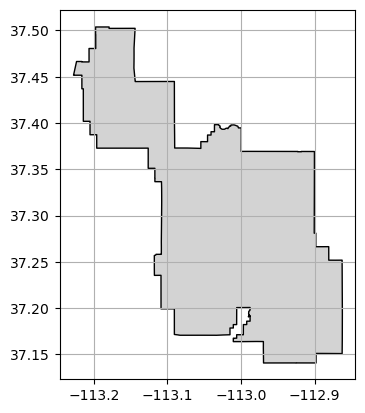

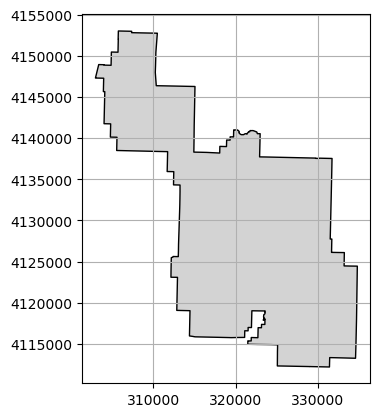

In [86]:
# Demonstrate the diff btw geographic n projected CRSs
# WGS84
zion.to_crs(4326).plot(edgecolor='black', color='lightgrey').grid()
# NAD83 / UTM zone 12N
zion.plot(edgecolor='black', color='lightgrey').grid();